In [9]:
# Clean Jupyter environment
%reset -f

In [10]:
name = 'trainingplans/*/Self/Marathon/*/*.yaml'

In [11]:
from garminworkouts.models.workout import Workout
import argparse
from garminworkouts.models.settings import settings

args = argparse.Namespace(trainingplan=name)
workouts, *_ = settings(args)
mileage, duration, tss, ECOs, Rdist, Rdists, day_min, day_max = Workout.load_metrics(workouts=workouts)

15_1 - 8.54 km - 0:50:00 - 115.0 ECOs
15_2 - 6.87 km - 0:45:00 - 45.0 ECOs
15_3 - 15.42 km - 1:30:00 - 170.5 ECOs
15_4 - 6.87 km - 0:45:00 - 45.0 ECOs
15_5 - 5.34 km - 0:35:00 - 35.0 ECOs
15_6 - 27.22 km - 2:30:00 - 330.0 ECOs
15_7 - 9.16 km - 1:00:00 - 60.0 ECOs
16_1 - 9.75 km - 0:55:00 - 178.81 ECOs
16_2 - 6.64 km - 0:40:00 - 68.0 ECOs
16_3 - 8.74 km - 0:45:00 - 117.6 ECOs
16_4 - 6.87 km - 0:45:00 - 45.0 ECOs
16_5 - 6.87 km - 0:45:00 - 45.0 ECOs
16_6 - 18.5 km - 1:45:00 - 189.0 ECOs
16_7 - 13.74 km - 1:30:00 - 90.0 ECOs
17_1 - 8.98 km - 0:50:00 - 174.74 ECOs
17_2A - 3.88 km - 0:21:00 - 117.6 ECOs
17_2B - 2.29 km - 0:15:00 - 15.0 ECOs
17_3 - 12.64 km - 1:15:00 - 138.0 ECOs
17_4 - 6.87 km - 0:45:00 - 45.0 ECOs
17_5 - 6.11 km - 0:40:00 - 40.0 ECOs
17_6 - 16.51 km - 1:40:00 - 182.0 ECOs
17_7 - 9.16 km - 1:00:00 - 60.0 ECOs
18_1 - 6.11 km - 0:40:00 - 40.0 ECOs
18_2 - 6.37 km - 0:40:00 - 54.0 ECOs
18_3 - 7.81 km - 0:45:00 - 88.5 ECOs
18_4 - 5.34 km - 0:35:00 - 35.0 ECOs
18_5 - 6.87 km - 0:

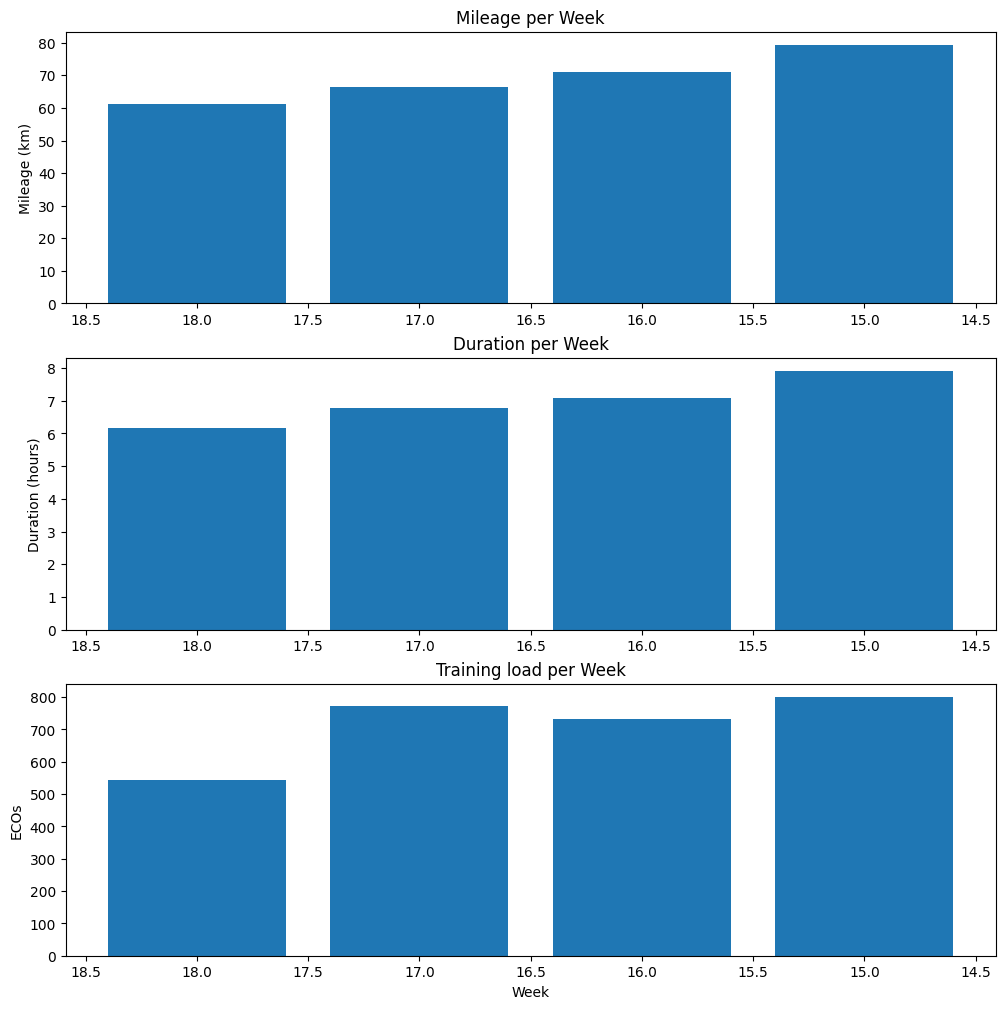

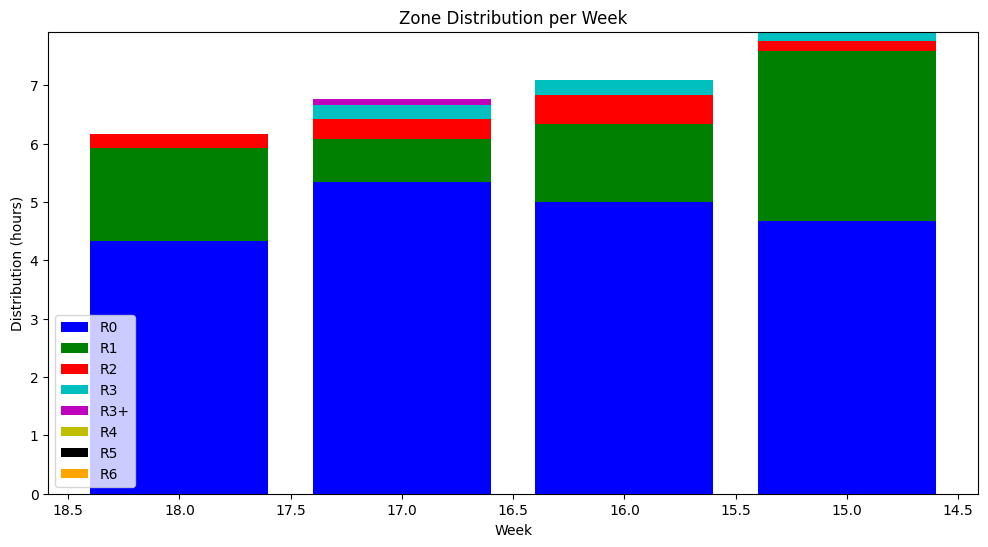

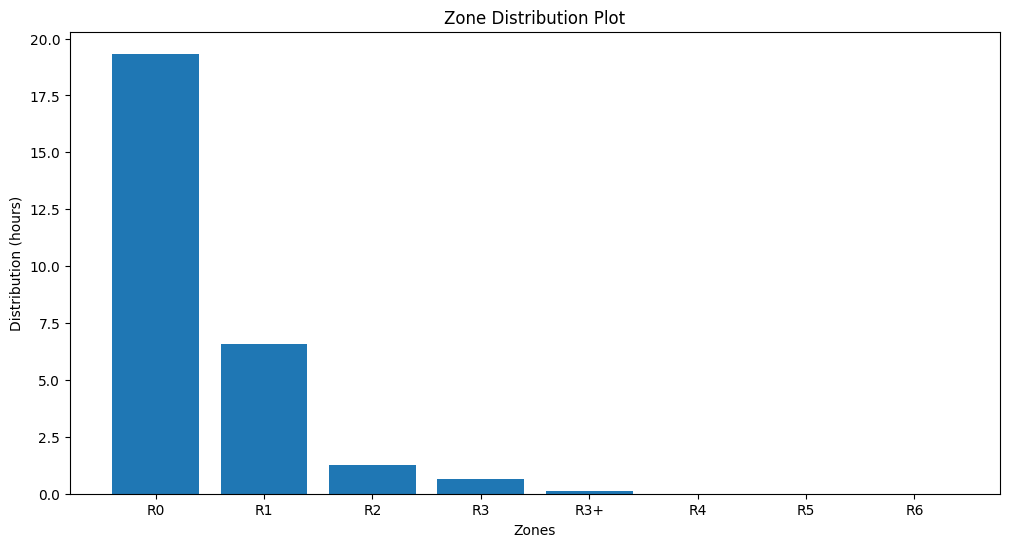

In [12]:
import matplotlib.pyplot as plt

weeks = list(range(len(mileage)))
plt.figure(figsize=(12, 12))

# Filter out weeks with zero values
non_zero_weeks = [week for week, mile in zip(weeks, mileage) if mile > 0]
non_zero_mileage = [mile for mile in mileage if mile > 0]
non_zero_ECOs = [eco for eco in ECOs if eco > 0]
non_zero_duration = [dur for dur in duration if dur.total_seconds() > 0]

plt.subplot(3, 1, 1)
plt.bar(non_zero_weeks[::-1], non_zero_mileage[::-1])
plt.ylabel('Mileage (km)')
plt.title('Mileage per Week')
plt.gca().invert_xaxis()

plt.subplot(3, 1, 2)
plt.bar(non_zero_weeks[::-1], [d.total_seconds() / 3600 for d in non_zero_duration[::-1]])
plt.ylabel('Duration (hours)')
plt.title('Duration per Week')
plt.gca().invert_xaxis()

plt.subplot(3, 1, 3)
plt.bar(non_zero_weeks[::-1], non_zero_ECOs[::-1])
plt.xlabel('Week')
plt.ylabel('ECOs')
plt.title('Training load per Week')
plt.gca().invert_xaxis()

plt.figure(figsize=(12, 6))
bottom = [0] * len(non_zero_weeks)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
labels = ['R0', 'R1', 'R2', 'R3', 'R3+', 'R4', 'R5', 'R6']

for i in range(len(Rdist)):
    values = [week[i] / 3600 for week in Rdists if sum(week) > 0]
    plt.bar(non_zero_weeks[::-1], values[::-1], bottom=bottom[::-1], color=colors[i], label=labels[i])
    bottom = [sum(x) for x in zip(bottom, values)]

plt.xlabel('Week')
plt.ylabel('Distribution (hours)')
plt.title('Zone Distribution per Week')
plt.legend()
plt.gca().invert_xaxis()

plt.figure(figsize=(12, 6))
plt.bar(range(len(Rdist)), [r / 3600 for r in Rdist])
plt.xlabel('Zones')
plt.ylabel('Distribution (hours)')
plt.title('Zone Distribution Plot')
plt.xticks(range(len(Rdist)), labels)
plt.show()